In the following notebook I present my answers to a problem set given to me about general SQL skills and general python and ML skills.

## SQL Exercise

You have a sales relational table that stores the simplified sales information of a given company. The table has the following CREATE DDL:


CREATE TABLE `sales` (

`order_id` varchar(32) NOT NULL,

`username` varchar(64) NOT NULL,

`order_date` datetime NOT NULL,

`product_id` varchar(32) NOT NULL,

`product_name` varchar(256) NOT NULL,

`total_amount` decimal(6,2) NOT NULL,

PRIMARY KEY (`order_id`),

KEY `sales_idx_product_id`(`purchased_product_id`), 

KEY `sales_idx_username` (`client_username`)) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4; 

The fields are self explanatory: they just represent when an order was made, who is the customer, which product they bought and the amount of the order.

This is a sample extract of this over simplified model: 

<center><img src="img/table1.png"></center>

The company wants an insight on the sales of the top Apple products the **Ipad pro** and the **Iphone Xs, aggregated by month**, so the first thing to do is to find a way to transform the table above into the following format: 

</center><img src="img/table2.png"></center>

### Questions

+ Describe, using SQL statements, how you would transform Table A into Table B.

Using the `EXTRACT` function the month could be obtained from the timestamp and to obtained in MySQL the pivot of the product names with a grouping is used the `CASE` command.

</center><img src="img/ans1.png"></center>

+ Would you use materialized tables or SQL Views?

As this request seems very specific for two of the new products, I would go with a SQL view. I could guess that other similar tables (but materialized) already exist to track the performance of the different products.

+ Is it possible to do this transformation using a single SQL statement?

In the above example the result is obtained using a single `SELECT` statement.

+ How would the transformation change if we wanted to group the sales by week number? And using the name of the month (i.e. July instead of the number of the month 07)? 

</center><img src="img/ans2.png"></center>

In the following [link](https://www.db-fiddle.com/f/3zMYiAUgPwvewy3TRrTvfW/3) the statements could be run.

## Python Exercise

In this section, we will build two models: One for classification and one for regression analysis. We will provide the datasets needed and some guidance through the process, asking some final questions about the construction and evaluation of the models.

### Case 1: Classification

We have the *seeds_dataset* available, which shows the information regarding the characteristics of different seeds. We want to build a model to be able to predict the class of a given seed, taking into account their different features. To solve the classification problem, we will need to follow the next steps:

+ Load the dataset from the file and name the columns. The features, in order of appearance, are the following:
    1.	Area.
    2.	Perimeter.
    3.	Compactness
    4.	Length of kernel.
    5.	Width of kernel.
    6.	Asymmetry coefficient.
    7.	Length of kernel groove.
    8.	Class (1, 2, 3) (target)
    
    
+ Separate the data into the predictor variables (X) and target variable (y)

+ Split X and y into training and testing datasets. *Tip: Sklearn has great functions to do so*.

+ Use the model of your choice to solve the multiclass problem: Fit the data and make the predictions.

+ Evaluate the results using the metric of your choice.

#### LOADING DATA

Data will be loaded as follows:

+ Area: area
+ Perimeter: per
+ Compactness: comp
+ Length of kernel: lok
+ Width of kernel: wok
+ Asymmetry coefficient: ac
+ Length of kernel groove: lokg
+ Class: class

In [13]:
import pandas as pd

col = ['area', 'per', 'comp', 'lok', 'wok', 'ac', 'lokg', 'class']
data = pd.read_csv('seeds_dataset.txt', names= col, sep='\t')

In [14]:
#Separating the target and features
label = data['class']
X = data.drop('class', axis = 1)

#Checking the balance of the data
label.value_counts()

3    70
2    70
1    70
Name: class, dtype: int64

In [6]:
#Creating the training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, label_train, label_val = train_test_split(X, label, 
                                                          random_state = 0,
                                                          shuffle = True)

The following code was took and adapted from Raheel Shaikh. Specifically from his medium post [*Choosing the Best Algorithm for your Classification Model*](https://medium.com/datadriveninvestor/choosing-the-best-algorithm-for-your-classification-model-7c632c78f38f)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost

classifiers = []

model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

for clf in classifiers:
    clf.fit(X_train, label_train)
    label_pred = clf.predict(X_val)
    acc = accuracy_score(label_val, label_pred)
    print("\n\nAccuracy of %s is \n %s" % (clf, acc))
    cm = confusion_matrix(label_val, label_pred)
    print("\nConfusion Matrix of %s is \n %s"%(clf, cm))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:13:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) is 
 0.9245283018867925

Confusion Matrix of XGB

### Questions

+ Which models did you choose? Why?

Following the cited article the higher accuracy score reported should guide the selection of the model, in which case the best model to use will be the Random Forest Classifier. Also, giving that the accuracy score just evaluate the total correct prediction over the total predictions, the confusion matrix provides insights to evaluate if there is an unbalanced in the wrong predictions.

I will not go deeper in this problem because of time constraint. But I am aware that more evaluations must be done to select a model. For example, this post of Harsha Goonewardana on [*Evaluating Multi-Class Classifiers*](https://medium.com/apprentice-journal/evaluating-multi-class-classifiers-12b2946e755b) gave me a clarer idea of this.

+ Regarding the evaluation, which metrics are you using for the classification problem? Why are you using them and how do you interpret the results? 

I used the accuracy score to assess the global effectiveness of the model and, to evaluate each of the labels, the confusion matrix allows to better understand how the wrong predicted values are distributed . 

### Case 2: Regression

Now you are a data analyst in a Real Estate company based in Boston, USA. We have the boston_housing dataset, available using the next Python sentence:

```python
from sklearn.datasets import load_boston
boston = load_boston()
```

Once we have the dataset loaded, we need to build the dataframe with the predictor attributes (13) and the target (MEDV). The description to the dataset is available using the next sentence:

```python
print(boston.DESCR)
```

Using the same methodology than in the classification problem, build a regression model to predict the `MEDV` variable using an algorithm of your choice, evaluating the results with your chosen metrics. Once this is done, create a visualization of a regression plot between the `MEDV` and `LSTAT` features.

#### LOADING DATA

In [117]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)  #Description of the dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [118]:
#Separating the target and the features
import pandas as pd
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.Series(boston.target, name = 'price')

In [119]:
#Creating the training sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0, shuffle = True)

#### SEEING DATA

In [120]:
#Taking a first look of the data
display(X_train.head())

X_train.describe()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
245   0.19133  22.0   5.86   0.0  0.431  5.605  70.2  7.9549   7.0  330.0   
59    0.10328  25.0   5.13   0.0  0.453  5.927  47.2  6.9320   8.0  284.0   
276   0.10469  40.0   6.41   1.0  0.447  7.267  49.0  4.7872   4.0  254.0   
395   8.71675   0.0  18.10   0.0  0.693  6.471  98.8  1.7257  24.0  666.0   
416  10.83420   0.0  18.10   0.0  0.679  6.782  90.8  1.8195  24.0  666.0   

     PTRATIO       B  LSTAT  
245     19.1  389.13  18.46  
59      19.7  396.90   9.22  
276     17.6  389.25   6.05  
395     20.2  391.98  17.12  
416     20.2   21.57  25.79

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean     3.412736   11.861478   11.083509    0.065963    0.556160    6.312683   
std      8.258225   23.810122    7.021496    0.248546    0.116179    0.693391   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.075200    0.000000    5.040000    0.000000    0.449000    5.904500   
50%      0.263630    0.000000    8.560000    0.000000    0.538000    6.229000   
75%      3.397665   20.000000   18.100000    0.000000    0.631000    6.676000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean    68.735620    3.781929    9.411609  403.226913   18.489710  358.808232   
std     28.214667    2.094931    8.676092  171.319579    2.191971   89.169412   
min      2.900000    1.174200    1.000000  187.000000   12.600000    0.320000   
25%     45.250000    2.100350    4.000000  276.000000   17.400000  376.125000   
50%     78.100000    3.215700    5.000000  329.000000   19.100000  391.930000   
75%     93.800000    5.116700   24.000000  666.000000   20.200000  395.960000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  379.000000  
mean    12.546280  
std      7.202756  
min      1.730000  
25%      6.700000  
50%     11.220000  
75%     17.030000  
max     36.980000

In [121]:
#Choosing the best features for the model
import sklearn.feature_selection as fs 
import itertools

selector = fs.SelectKBest(score_func=fs.f_regression, k='all')
feat = selector.fit(X_train, y_train)
name = boston.feature_names
sco = feat.scores_
pv = feat.pvalues_

for n, s, p in itertools.zip_longest(name, sco, pv):
    print(f'Variable: {n} - Score: {s} - P-value: {p}')


Variable: CRIM - Score: 73.94468454462033 - P-value: 2.1804119176573256e-16
Variable: ZN - Score: 69.35659976523706 - P-value: 1.5383405909533648e-15
Variable: INDUS - Score: 145.3149037744784 - P-value: 1.5792550564438345e-28
Variable: CHAS - Score: 9.323317642631839 - P-value: 0.0024231703941945343
Variable: NOX - Score: 97.1690367386003 - P-value: 1.514551108483817e-20
Variable: RM - Score: 358.6394391754382 - P-value: 1.1022488207974532e-56
Variable: AGE - Score: 77.31646961784335 - P-value: 5.258674876337431e-17
Variable: DIS - Score: 31.00222706246078 - P-value: 4.904629426282425e-08
Variable: RAD - Score: 78.6146701342746 - P-value: 3.0505235332563386e-17
Variable: TAX - Score: 130.84765166696542 - P-value: 3.268234383354333e-26
Variable: PTRATIO - Score: 169.3375577874236 - P-value: 3.120725876570216e-32
Variable: B - Score: 52.48833910394028 - P-value: 2.460712914887626e-12
Variable: LSTAT - Score: 502.68107893902044 - P-value: 2.33979209133908e-71


In [122]:
#Selecting the 5 most relevant features from above
selector = fs.SelectKBest(score_func=fs.f_regression, k=5)
feat = selector.fit(X_train, y_train).get_support()
X_new = X_train.loc[:, feat]
X_new

INDUS     RM    TAX  PTRATIO  LSTAT
245   5.86  5.605  330.0     19.1  18.46
59    5.13  5.927  284.0     19.7   9.22
276   6.41  7.267  254.0     17.6   6.05
395  18.10  6.471  666.0     20.2  17.12
416  18.10  6.782  666.0     20.2  25.79
..     ...    ...    ...      ...    ...
323   7.38  5.708  287.0     19.6  11.74
192   3.44  7.178  398.0     15.2   2.87
117  10.01  6.021  432.0     17.8  10.30
47    6.91  6.030  233.0     17.9  18.80
172   4.05  5.572  296.0     16.6  14.69

[379 rows x 5 columns]

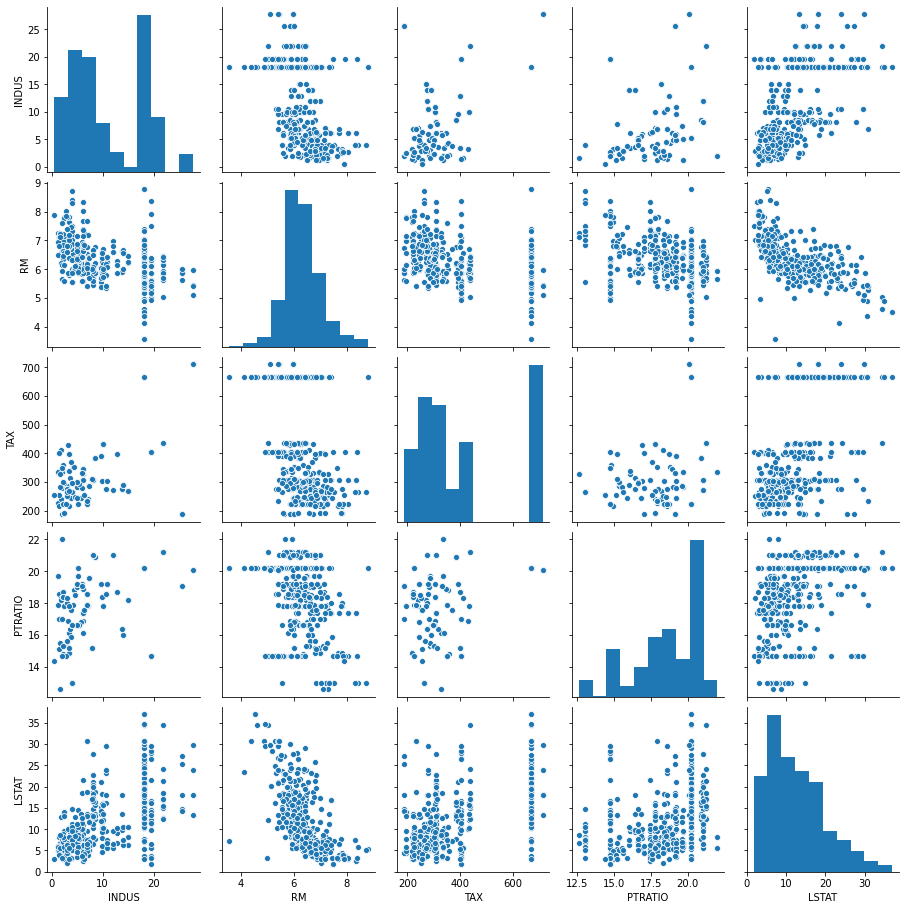

In [123]:
# Observing the relation between the selected variables and price
import seaborn as sns

X_new_p = X_new.copy()
X_new_p['price'] = y_train
sns.pairplot(X_new)

It could be saw a clear pattern for `RM` and `LSTAT`. Also, it could be notice that there is a group of observations (the most expensive homes) that appears to have a different behaviour, in which case they appropiate thing to do is analyzed them separetely. 

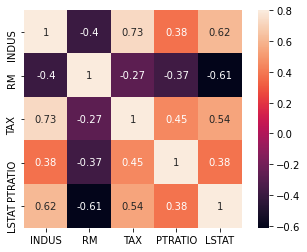

In [124]:
#Lets plot a correlation matrix to observed this relationship more claerly
corrmap = X_new.corr()
sns.heatmap(corrmap, vmax=.8, square=True, annot=True)

#### CHOOSING A MODEL

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

X_val_new = X_val.loc[:, feat] #Selecting the 5 best features for validation dataset

regressors = []

model1 = LinearRegression()
regressors.append(model1)
model2 = RandomForestRegressor()
regressors.append(model2)
model3 = XGBRegressor()
regressors.append(model3)

for reg in regressors:
    reg.fit(X_new, y_train)
    y_pred = reg.predict(X_val_new)
    r2 = r2_score(y_val, y_pred)
    print("\nR^2 of %s is \n %s" % (reg, r2))


R^2 of LinearRegression() is 
 0.5384324145902969

R^2 of RandomForestRegressor() is 
 0.716466656595509

R^2 of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) is 
 0.7186608964511225


Text(0, 0.5, 'Predicted price ($1000s)')

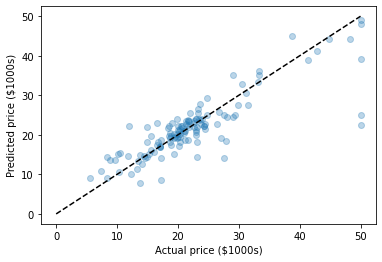

In [129]:
#Plotting the predictions against the observed
import matplotlib.pyplot as plt

plt.scatter(y_val, y_pred, alpha=0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('Actual price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

Text(0, 0.5, '$y - \\hat y$')

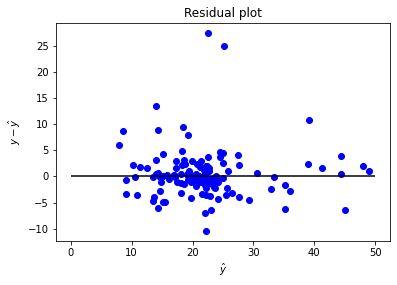

In [130]:
#Plotting the residuals to assess the model bias

x_plot = plt.scatter(y_pred, (y_val-y_pred), c='b')
plt.hlines(y=0, xmin= 0, xmax=50)
plt.title('Residual plot')
plt.xlabel('$\hat y$')
plt.ylabel('$y - \hat y$')

+ Scatter plot of the `price` and `LSTAT`

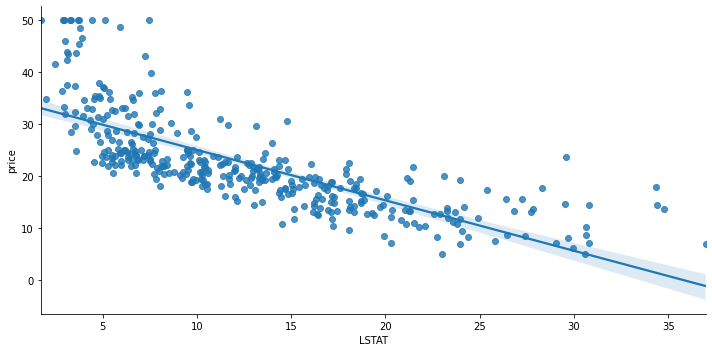

In [136]:
sns.lmplot("LSTAT", "price", X_new_p, order=1, aspect=2)

### Questions

+ Which model did you choose? Why?

Of the three models choosed, following the highest $R^2$, the XGBoost model is selected because a slighty better performance. Maybe, adding other relevant variables or with a process of parameter tuning a more clear difference and a best model could be created.

+ Regarding the evaluation, which metrics are you using for the classification problem? Why are you using them and how do you interpret the results?

I used the coeficient of determination to assess the fit of the models a make a comparison between them. Besides, with the residual plot it is visible that may be a group of observations that follows a different behaviour. Then, an separate model must be done for them and process the present model without those observations.

+ About the plot. How do you interpret the results? Which kind of relation is shown? Is it enough to take some conclusions or do we need to perform further analysis?

Seeing the graph it could be said that there is a negative relationship between the `% lower status of the population` and the `Median value of owner-occupied homes`, At higher levels of LSTAT the average price of a house will go down. The only conclusion that could be derive from this (and domain knowledge) is that `LSTAT` could be a meaningfull variable to explain the changes of the `price`. 